# Reward Function Validation

Reward functions can easily get complex to visualize once it starts taking a number of factors into account.  This notebook will help with a quick validation by running it over the track and a number of 

In [3]:
# Load the track to exercise
from math import log
#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


Waypoints shape: (203, 6)
Centerline length: 21.74
Track bounds:  (0.5871459377974991, -3.1185757246211283, 9.349370097060229, 3.0140815800413567)
[4.60918546 1.6430465  4.58646449 1.30659668 4.63079245 1.97884398]
Track width:  0.6737072087508159


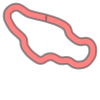

In [5]:

TRACK_NAME = 'Canada_Training'

# Helper functions


# Visualize the Track and Waypoints

# Tracks Available::
# AWS_track                Straight_track                Oval_track
# Bowtie_track             H_track                       reinvent_base
# China_track              Mexico_track                  Canada_training

waypoints = np.load("tracks/%s.npy" % TRACK_NAME)
print("Waypoints shape: {}".format(waypoints.shape))

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(waypoints[:,0:2])
l_inner_border = LineString(waypoints[:,2:4])
l_outer_border = LineString(waypoints[:,4:6])
road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))

# Print some useful track analysis data
print("Centerline length: %0.2f" % l_center_line.length)
print("Track bounds: ", road_poly.bounds)
print(waypoints[0])
print("Track width: ", np.linalg.norm(waypoints[0,4:6] - waypoints[0,2:4]))
#print("Track y min/max: ", pd.DataFrame(outer_border)['y'])
road_poly


Text(4.817766904830933, 1.5820860266685486, '200')

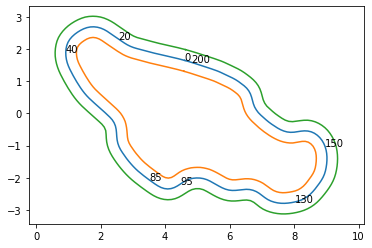

In [33]:
# scan the track and invoke the reward function for each waypoint

# Sections of Canada_Training
plt.plot(center_line[:,0:1], center_line[:,1:2])
plt.plot(inner_border[:,0:1], inner_border[:,1:2])
plt.plot(outer_border[:,0:1], outer_border[:,1:2])
plt.axis('equal')
plt.annotate('0', center_line[0])
# Straight
plt.annotate('20', center_line[20])
# Sharp left
plt.annotate('40', center_line[40])
# Straight
plt.annotate('85', center_line[85])
# Easy left
plt.annotate('95', center_line[95])
# Straight
plt.annotate('130', center_line[130])
# Easy left
plt.annotate('150', center_line[150])
# Straight
plt.annotate('200', center_line[200])

In [56]:
actions = {
    "sharp left":  0,
    "easy left":   1,
    "straight":    2,
    "easy right":  3,
    "sharp right": 4
}

# NOTE: These are specific to Canada_Training.npy waypoints
checkpoints = [
    # checkpoint, preceding action (makes loop easier)
    (20,
     "straight"),
    (40,
     "sharp left"),
    (85,
     "straight"),
    (95,
     "easy left"),
    (130,
     "straight"),
    (150,
     "easy left"),
    (10000,
     "straight")
]

# Test reward function
def reward_function(params):
    closest_waypoint = params["closest_waypoints"][0]
    for i in range(len(checkpoints)):
        checkpoint, action = checkpoints[i]
        if closest_waypoint < checkpoint:
            
            if params["action"] == actions[action]:
                # full reward it using the right action for the leg
                return 1.0
            elif abs(params["action"] - actions[action]) == 1:
                # allow the car to use adjacent actions without too much penalty
                return 0.25
            else:
                return 1e-3

In [57]:
# Test the reward function
for i in range(203):
    rewards_per_waypoint = list()
    for key in actions:
        reward = reward_function({'closest_waypoints': [i, i+1], 'action': actions[key]})
        rewards_per_waypoint.append(reward)
    print(i, rewards_per_waypoint)


0 [0.001, 0.25, 1.0, 0.25, 0.001]
1 [0.001, 0.25, 1.0, 0.25, 0.001]
2 [0.001, 0.25, 1.0, 0.25, 0.001]
3 [0.001, 0.25, 1.0, 0.25, 0.001]
4 [0.001, 0.25, 1.0, 0.25, 0.001]
5 [0.001, 0.25, 1.0, 0.25, 0.001]
6 [0.001, 0.25, 1.0, 0.25, 0.001]
7 [0.001, 0.25, 1.0, 0.25, 0.001]
8 [0.001, 0.25, 1.0, 0.25, 0.001]
9 [0.001, 0.25, 1.0, 0.25, 0.001]
10 [0.001, 0.25, 1.0, 0.25, 0.001]
11 [0.001, 0.25, 1.0, 0.25, 0.001]
12 [0.001, 0.25, 1.0, 0.25, 0.001]
13 [0.001, 0.25, 1.0, 0.25, 0.001]
14 [0.001, 0.25, 1.0, 0.25, 0.001]
15 [0.001, 0.25, 1.0, 0.25, 0.001]
16 [0.001, 0.25, 1.0, 0.25, 0.001]
17 [0.001, 0.25, 1.0, 0.25, 0.001]
18 [0.001, 0.25, 1.0, 0.25, 0.001]
19 [0.001, 0.25, 1.0, 0.25, 0.001]
20 [1.0, 0.25, 0.001, 0.001, 0.001]
21 [1.0, 0.25, 0.001, 0.001, 0.001]
22 [1.0, 0.25, 0.001, 0.001, 0.001]
23 [1.0, 0.25, 0.001, 0.001, 0.001]
24 [1.0, 0.25, 0.001, 0.001, 0.001]
25 [1.0, 0.25, 0.001, 0.001, 0.001]
26 [1.0, 0.25, 0.001, 0.001, 0.001]
27 [1.0, 0.25, 0.001, 0.001, 0.001]
28 [1.0, 0.25, 0.001, 